In [1]:
import pandas as pd

data = pd.read_csv('train.csv.zip')
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
data.shape

(159571, 8)

In [17]:
toxClass = list(data.columns[2:])
toxClass

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [21]:
for i in toxClass:
    print(100*data[i].value_counts(normalize=True))
    print()

toxic
0    90.415552
1     9.584448
Name: proportion, dtype: float64

severe_toxic
0    99.000445
1     0.999555
Name: proportion, dtype: float64

obscene
0    94.705178
1     5.294822
Name: proportion, dtype: float64

threat
0    99.700447
1     0.299553
Name: proportion, dtype: float64

insult
0    95.063639
1     4.936361
Name: proportion, dtype: float64

identity_hate
0    99.119514
1     0.880486
Name: proportion, dtype: float64



In [12]:
counts = data.iloc[:, 2:].sum()
no_ones_rows = data[(data.iloc[:, 2:] == 0).all(axis=1)]
free = len(no_ones_rows)
counts['toxic free'] = free
counts

toxic             15294
severe_toxic       1595
obscene            8449
threat              478
insult             7877
identity_hate      1405
toxic free       143346
dtype: int64

In [13]:
import plotly.express as px

fig = px.pie(values=counts, names=counts.index, title='Count of Toxic Labels')
fig.show()

In [14]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    
    return ' '.join(words)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kartheepan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kartheepan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
preprocessedText = []
for i in range(data.shape[0]//3):
    preprocessedText.append(preprocess_text(data['comment_text'][i]))

In [32]:
for i in range(data.shape[0]//3, data.shape[0]*2//3):
    preprocessedText.append(preprocess_text(data['comment_text'][i]))

In [33]:
for i in range(data.shape[0]*2//3, data.shape[0]):
    if i == 115606 : preprocessedText.append(data['comment_text'][i])
    else : preprocessedText.append(preprocess_text(data['comment_text'][i]))

159571


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,preprocessed_text
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explan edit made usernam hardcor metallica fan...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,daww match background colour im seemingli stuc...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man im realli tri edit war guy constantli ...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,cant make real suggest improv wonder section s...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,sir hero chanc rememb page that


In [34]:
data['comment_text'] = preprocessedText
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,preprocessed_text
0,0000997932d777bf,explan edit made usernam hardcor metallica fan...,0,0,0,0,0,0,explan edit made usernam hardcor metallica fan...
1,000103f0d9cfb60f,daww match background colour im seemingli stuc...,0,0,0,0,0,0,daww match background colour im seemingli stuc...
2,000113f07ec002fd,hey man im realli tri edit war guy constantli ...,0,0,0,0,0,0,hey man im realli tri edit war guy constantli ...
3,0001b41b1c6bb37e,cant make real suggest improv wonder section s...,0,0,0,0,0,0,cant make real suggest improv wonder section s...
4,0001d958c54c6e35,sir hero chanc rememb page that,0,0,0,0,0,0,sir hero chanc rememb page that


In [38]:
from collections import defaultdict
toxicDic = defaultdict(list)

for index, row in data.iterrows():
    for toxicTrait in data.columns[2:]:
        if row[toxicTrait] == 1:
            toxicDic[toxicTrait].append(row['comment_text'])

In [49]:
data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explan edit made usernam hardcor metallica fan...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww match background colour im seemingli stuc...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im realli tri edit war guy constantli ...,0,0,0,0,0,0
3,0001b41b1c6bb37e,cant make real suggest improv wonder section s...,0,0,0,0,0,0
4,0001d958c54c6e35,sir hero chanc rememb page that,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,second time ask view complet contradict covera...,0,0,0,0,0,0
159567,ffea4adeee384e90,asham horribl thing put talk page 128611993,0,0,0,0,0,0
159568,ffee36eab5c267c9,spitzer umm there actual articl prostitut ring...,0,0,0,0,0,0
159569,fff125370e4aaaf3,look like actual put speedi first version dele...,0,0,0,0,0,0


In [39]:
for toxicTrait in toxicDic:
    print(toxicTrait, len(toxicDic[toxicTrait]))

toxic 15294
severe_toxic 1595
obscene 8449
insult 7877
identity_hate 1405
threat 478


## wordCloud

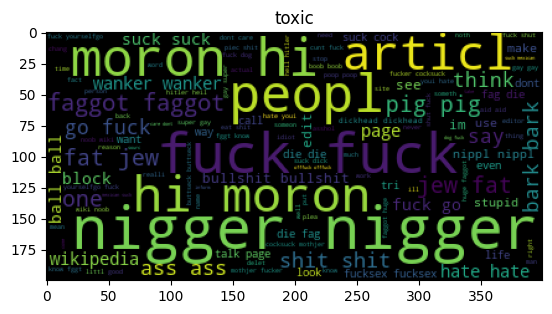

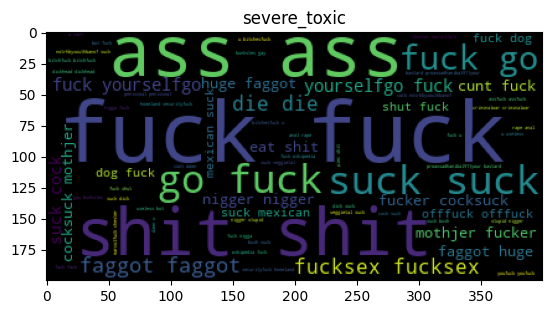

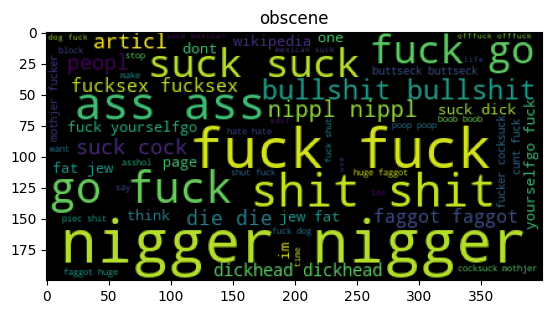

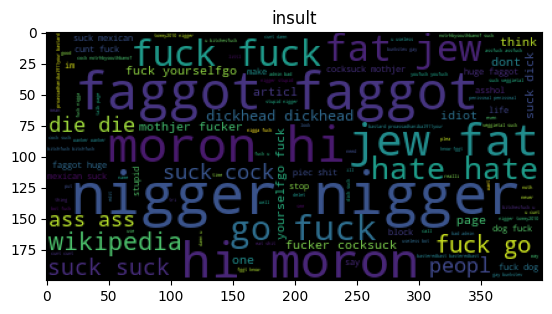

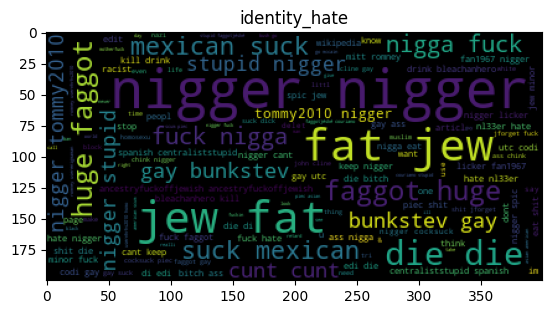

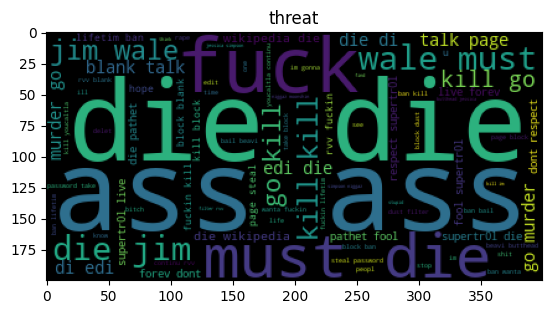

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
f = 221

for toxicTrait in toxicDic:
    words = ''
    for sentence in toxicDic[toxicTrait] : words += sentence
    wc = wordcloud = WordCloud(background_color='black').generate(words)
    plt.figure(f)
    plt.title(toxicTrait)
    plt.imshow(wc)
    f += 1

## TF-IDF
## Logistic Regression

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, hamming_loss

vectorizer = TfidfVectorizer(max_features=1000)
x = vectorizer.fit_transform(data['comment_text']).toarray()

y = data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

classifiers = {}
for column in y_train.columns:
    classifier = LogisticRegression(penalty='l2', random_state=42, max_iter=500)
    classifier.fit(X_train, y_train[column])
    classifiers[column] = classifier

y_pred = pd.DataFrame()
for column, classifier in classifiers.items():
    y_pred[column] = classifier.predict(X_test)

for column in y_test.columns:
    print(f"\nClassification Report for {column}:")
    print(classification_report(y_test[column], y_pred[column]))
    print("Accuracy Score:", accuracy_score(y_test[column], y_pred[column]))
    print("Hamming Loss:", hamming_loss(y_test[column], y_pred[column]))


Classification Report for toxic:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     28859
           1       0.89      0.57      0.70      3056

    accuracy                           0.95     31915
   macro avg       0.92      0.78      0.84     31915
weighted avg       0.95      0.95      0.95     31915

Accuracy Score: 0.9524361585461382
Hamming Loss: 0.04756384145386182

Classification Report for severe_toxic:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31594
           1       0.58      0.23      0.33       321

    accuracy                           0.99     31915
   macro avg       0.79      0.61      0.66     31915
weighted avg       0.99      0.99      0.99     31915

Accuracy Score: 0.9906000313332289
Hamming Loss: 0.00939996866677111

Classification Report for obscene:
              precision    recall  f1-score   support

           0       0.98      1.00      0.9